正在处理密度 0.8 的轨迹文件...


/scratch/wx2237/conda_envs/myenv/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:632: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')
/scratch/wx2237/conda_envs/myenv/lib/python3.9/site-packages/MDAnalysis/coordinates/LAMMPS.py:598: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt


正在处理密度 0.9 的轨迹文件...
正在处理密度 1.0 的轨迹文件...
正在处理密度 1.1 的轨迹文件...
正在处理密度 1.2 的轨迹文件...
正在处理密度 1.3 的轨迹文件...
正在处理密度 1.4 的轨迹文件...
正在处理密度 1.5 的轨迹文件...


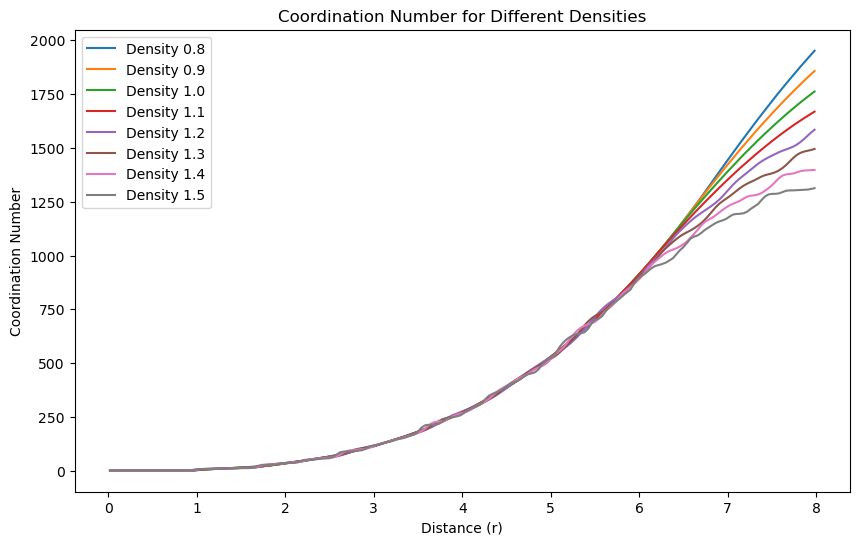

配位数图已保存为: Combined_Coordination_Number.png


In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import numpy as np
import matplotlib.pyplot as plt

# 定义轨迹文件
trajectory_files = [
    "3dWCA_T0.1_d0.8_N100000.lammpstrj",
    "3dWCA_T0.1_d0.9_N100000.lammpstrj",
    "3dWCA_T0.1_d1.0_N100000.lammpstrj",
    "3dWCA_T0.1_d1.1_N100000.lammpstrj",
    "3dWCA_T0.1_d1.2_N100000.lammpstrj",
    "3dWCA_T0.1_d1.3_N100000.lammpstrj",
    "3dWCA_T0.1_d1.4_N100000.lammpstrj",
    "3dWCA_T0.1_d1.5_N100000.lammpstrj"
]

# 设置计算参数
range_max = 8.0
nbins = 200

# 创建配位数合并图
plt.figure(figsize=(10, 6))
plt.title("Coordination Number for Different Densities")
plt.xlabel("Distance (r)")
plt.ylabel("Coordination Number")

# 遍历不同密度的轨迹文件
for traj_file in trajectory_files:
    density = traj_file.split('_d')[1].split('_')[0]  # 从文件名提取密度信息
    print(f"正在处理密度 {density} 的轨迹文件...")

    # 使用 MDAnalysis 加载 `.lammpstrj` 文件
    u = mda.Universe(traj_file, format="LAMMPSDUMP")

    # 选择所有原子
    selection = u.select_atoms("all")

    # 计算 RDF
    rdf_calculator = rdf.InterRDF(selection, selection, range=(0.0, range_max), nbins=nbins)
    rdf_calculator.run()

    # 计算配位数 (通过积分 RDF)
    r_values = rdf_calculator.results.bins
    g_r_values = rdf_calculator.results.rdf
    dr = r_values[1] - r_values[0]
    coordination_number = np.cumsum(4 * np.pi * r_values**2 * g_r_values * dr)

    # 在配位数图上添加不同密度的数据
    plt.plot(r_values, coordination_number, label=f'Density {density}')

# 显示并保存配位数合并图
plt.legend()
coordination_filename = "Combined_Coordination_Number.png"
plt.savefig(coordination_filename)
plt.show()

print(f"配位数图已保存为: {coordination_filename}")